In [148]:
"""!pip install pandas
!pip install matplotlib
!pip install seaborn 
!pip install numpy 
!pip install -U scikit-learn
!pip install statsmodels"""

'!pip install pandas\n!pip install matplotlib\n!pip install seaborn \n!pip install numpy \n!pip install -U scikit-learn\n!pip install statsmodels'

CARGA Y LIMPIEZA DE DATOS

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm

In [150]:
archivo = 'C:/Users/ymnl_/Downloads/Excel RRSS.xlsx'
df_rrss0 = pd.read_excel(archivo)
#df_rrss0['Rural es mayor Urba'] = np.where(df_rrss0['POB_URBANA_INEI']-df_rrss0["POB_RURAL_INEI"] > 0, 'Si', 'No')
#df_rrss0.head()

In [151]:
#df_rrss["GENERACION_MUN_TANIO"]=df_rrss["GENERACION_MUN_TANIO"].str.replace('.', '').str.replace(',', '.').astype(float)

In [152]:
df_rrss=df_rrss0#[df_rrss0["Rural es mayor Urba"]=="Si"]
df_rrss["MiPyME-COMERCIO"]=df_rrss["MiPyME-COMERCIO"].fillna(0)
df_rrss["GE-MANUFACTURA"]=df_rrss["GE-MANUFACTURA"].fillna(0)
df_rrss["MiPyME-MANUFACTURA"]=df_rrss["MiPyME-MANUFACTURA"].fillna(0)
df_rrss["GENERACION_MUN_TANIO"]=df_rrss["GENERACION_MUN_TANIO"].fillna(0)

#Convertirmos lo valores que queremos a tipo float
df_rrss[["MiPyME-COMERCIO","GE-MANUFACTURA","MiPyME-MANUFACTURA","GENERACION_MUN_TANIO"]].astype(float)


#Agregamos las transformaciones con logaritrmo
df_rrss["Log Poblacion Urbana"]=np.log(df_rrss["POB_URBANA_INEI"])
df_rrss["Log Poblacion Rural"]=np.log(df_rrss["POB_RURAL_INEI"]+1)
df_rrss["Log Residuos solidos municipales"]=np.log(df_rrss["GENERACION_MUN_TANIO"]+1)
df_rrss["Log MiPyME-COMERCIO"]=np.log(df_rrss["MiPyME-COMERCIO"]+1)
df_rrss["Log MiPyME-MANUFACTURA"]=np.log(df_rrss["MiPyME-MANUFACTURA"]+1)
df_rrss["Log GE-MANUFACTURA"]=np.log(df_rrss["GE-MANUFACTURA"]+1)


print(df_rrss.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891 entries, 0 to 1890
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   IDDIST                            1891 non-null   int64  
 1   NOMBDEP                           1891 non-null   object 
 2   NOMBPROV                          1891 non-null   object 
 3   NOMBDIST                          1891 non-null   object 
 4   NOM_CAPITAL (LEGAL)               1891 non-null   object 
 5   COD_ REG_NAT                      1891 non-null   int64  
 6   REGION NATURAL                    1891 non-null   object 
 7   REGION_NATURAL                    1890 non-null   object 
 8   TIPO_MUNICIPALIDAD                1890 non-null   object 
 9   POB_URBANA_INEI                   1890 non-null   float64
 10  POB_RURAL_INEI                    1890 non-null   float64
 11  CLASIFICACION_MUNICIPAL_MEF       1890 non-null   object 
 12  GENERA

In [153]:
df_rrss_sinNaN= df_rrss.dropna(subset=["TIPO_MUNICIPALIDAD"])

#Vemos que categorías hay en tipo de municipalidad
muni= df_rrss_sinNaN["TIPO_MUNICIPALIDAD"].unique()
print(muni)



['DISTRITAL' 'PROVINCIAL']


In [154]:
#Reemplazamos los valores de distrital y provincial
valores={"DISTRITAL":1,"PROVINCIAL":0}
df_rrss_sinNaN["TIPO_MUNICIPALIDAD CONT"]=df_rrss_sinNaN["TIPO_MUNICIPALIDAD"].map(valores)
print(df_rrss_sinNaN)

      IDDIST   NOMBDEP          NOMBPROV       NOMBDIST NOM_CAPITAL (LEGAL)  \
0      10111  AMAZONAS       CHACHAPOYAS        LEVANTO             LEVANTO   
1      10516  AMAZONAS              LUYA  SAN CRISTOBAL                OLTO   
2      20513    ANCASH         BOLOGNESI        PACLLON             PACLLON   
3      20605    ANCASH           CARHUAZ       ATAQUERO             CARHUAC   
4      20902    ANCASH           CORONGO            ACO                 ACO   
...      ...       ...               ...            ...                 ...   
1886  250102   UCAYALI  CORONEL PORTILLO     CAMPOVERDE         CAMPO VERDE   
1887  250105   UCAYALI  CORONEL PORTILLO    YARINACOCHA       PUERTO CALLAO   
1888  250107   UCAYALI  CORONEL PORTILLO       MANANTAY        SAN FERNANDO   
1889  250301   UCAYALI        PADRE ABAD     PADRE ABAD            AGUAYTIA   
1890  250304   UCAYALI        PADRE ABAD        NESHUYA        MONTE ALEGRE   

      COD_ REG_NAT REGION NATURAL REGION_NATURAL TI

C:\Users\ymnl_\AppData\Local\Temp\ipykernel_12096\4167678193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rrss_sinNaN["TIPO_MUNICIPALIDAD CONT"]=df_rrss_sinNaN["TIPO_MUNICIPALIDAD"].map(valores)


In [155]:
#Revisamos los estadísticos de las principales columnas a evaluar
print(df_rrss_sinNaN.describe())

              IDDIST  COD_ REG_NAT  POB_URBANA_INEI  POB_RURAL_INEI  \
count    1890.000000   1890.000000     1.890000e+03     1890.000000   
mean   106801.355556      2.054497     1.431427e+04     3164.731217   
std     67175.092961      0.780040     5.716429e+04     5085.930814   
min     10101.000000      1.000000     5.100000e+01        0.000000   
25%     50403.250000      2.000000     4.885000e+02      421.000000   
50%    100314.500000      2.000000     1.312000e+03     1456.500000   
75%    150805.750000      2.000000     4.885000e+03     3717.500000   
max    250401.000000      4.000000     1.203125e+06    82773.000000   

       GENERACION_MUN_TANIO  MiPyME-COMERCIO  MiPyME-MANUFACTURA  \
count           1890.000000      1890.000000         1890.000000   
mean            4346.220106       501.728571           95.511640   
std            19504.182133      2291.668135          518.785915   
min               11.700000         0.000000            0.000000   
25%              109

In [156]:
#Verificamos que columnas son las que presentan un valor nan
columnas_nan=df_rrss_sinNaN.isna().any()
print(columnas_nan)

IDDIST                              False
NOMBDEP                             False
NOMBPROV                            False
NOMBDIST                            False
NOM_CAPITAL (LEGAL)                 False
COD_ REG_NAT                        False
REGION NATURAL                      False
REGION_NATURAL                      False
TIPO_MUNICIPALIDAD                  False
POB_URBANA_INEI                     False
POB_RURAL_INEI                      False
CLASIFICACION_MUNICIPAL_MEF         False
GENERACION_MUN_TANIO                False
RRSS_INDUSTRIAL                      True
MiPyME-COMERCIO                     False
MiPyME-MANUFACTURA                  False
GE-MANUFACTURA                      False
Log Poblacion Urbana                False
Log Poblacion Rural                 False
Log Residuos solidos municipales    False
Log MiPyME-COMERCIO                 False
Log MiPyME-MANUFACTURA              False
Log GE-MANUFACTURA                  False
TIPO_MUNICIPALIDAD CONT           

ANALISIS EXPLORATORIO DE DATOS

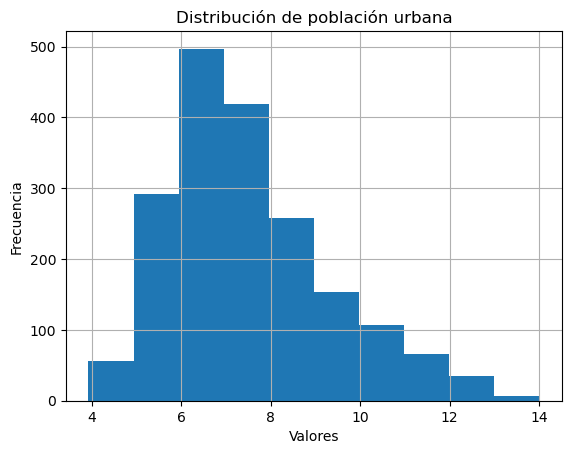

In [157]:
#Poblacion rural
df_rrss_sinNaN["Log Poblacion Urbana"].hist()
plt.title("Distribución de población urbana")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()


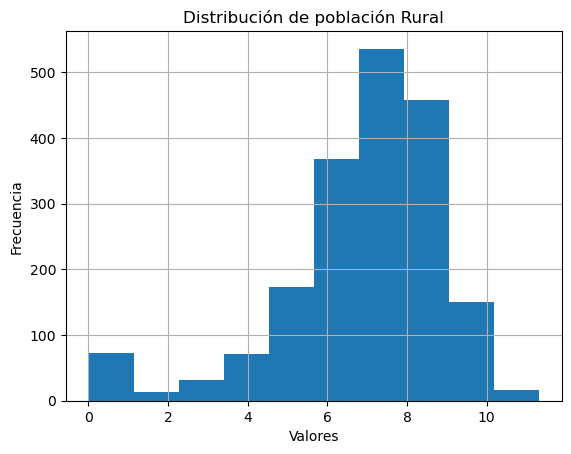

In [158]:
#Población urbana
df_rrss_sinNaN["Log Poblacion Rural"].hist()
plt.title("Distribución de población Rural")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()


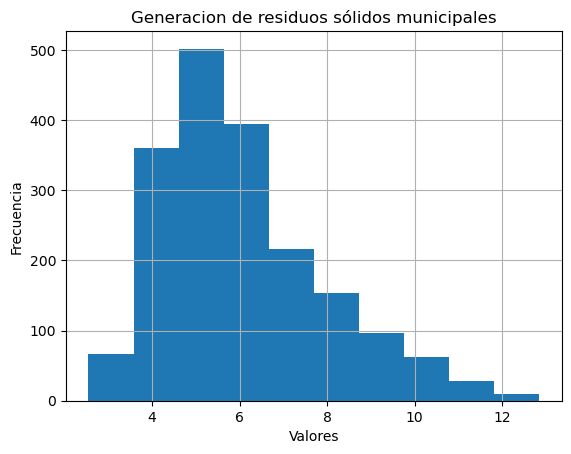

In [159]:
#Generacion de residuos municipales
df_rrss_sinNaN["Log Residuos solidos municipales"].hist()
plt.title("Generacion de residuos sólidos municipales")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()

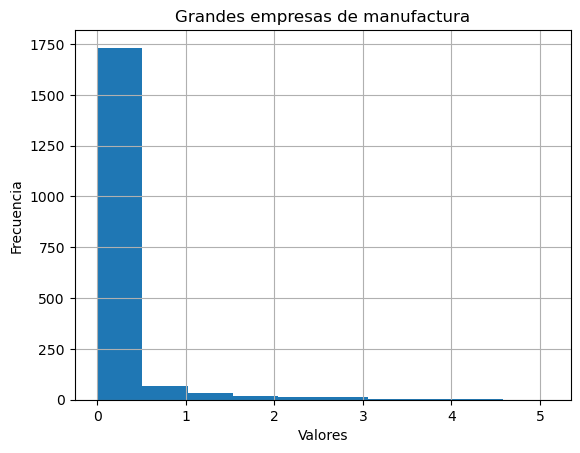

In [160]:
#Histograma de GE-Manufactura
df_rrss_sinNaN["Log GE-MANUFACTURA"].hist()
plt.title("Grandes empresas de manufactura")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()

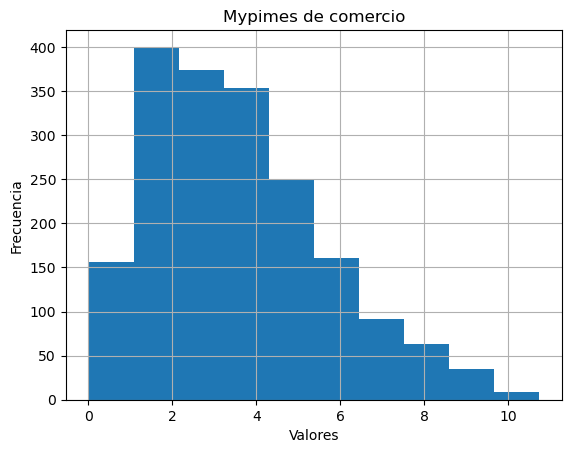

In [161]:
#Histograma de Mipyme-Manufactura
df_rrss_sinNaN["Log MiPyME-COMERCIO"].hist()
plt.title("Mypimes de comercio")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()

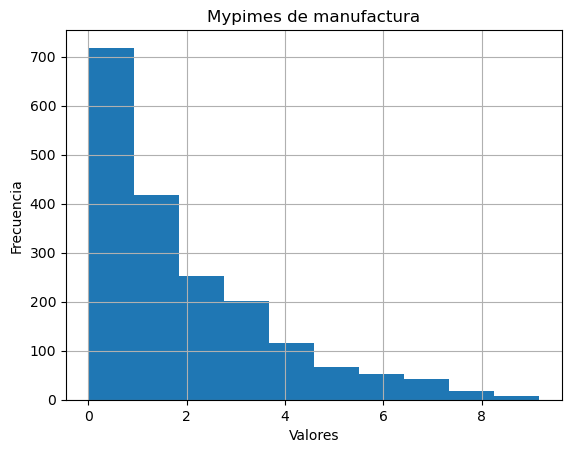

In [162]:
#Histograma de Mipyme-Manufactura
df_rrss_sinNaN["Log MiPyME-MANUFACTURA"].hist()
plt.title("Mypimes de manufactura")
plt.xlabel("Valores")
plt.ylabel("Frecuencia") 
plt.show()

In [163]:
df_var=df_rrss_sinNaN[["Log Poblacion Urbana",
                        "Log Poblacion Rural",                    
                        "Log Residuos solidos municipales",            
                        "Log MiPyME-COMERCIO",                 
                        "Log MiPyME-MANUFACTURA",              
                        "Log GE-MANUFACTURA"
                        #,"TIPO_MUNICIPALIDAD CONT"
                        ]]

In [164]:
estandarizar = StandardScaler()
estandarizar_variables = estandarizar.fit_transform(df_var)

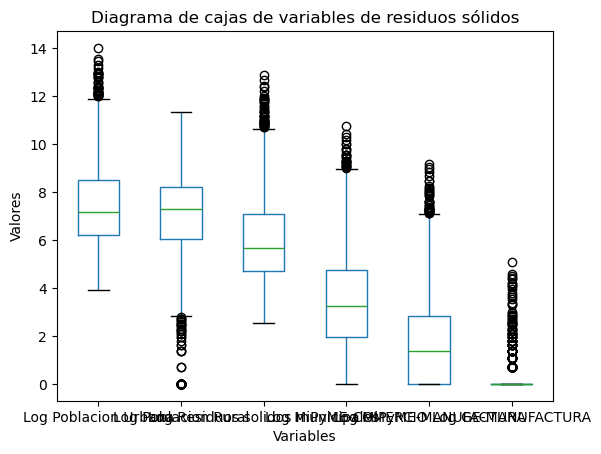

In [165]:
df_var.boxplot(column=["Log Poblacion Urbana",
                        "Log Poblacion Rural",                    
                        "Log Residuos solidos municipales",            
                        "Log MiPyME-COMERCIO",                 
                        "Log MiPyME-MANUFACTURA",              
                        "Log GE-MANUFACTURA"
                        #,"TIPO_MUNICIPALIDAD CONT"                   
                        ]
                        , grid=False)

#Añadir títulos y etiquetas
plt.title("Diagrama de cajas de variables de residuos sólidos")
plt.xlabel("Variables")
plt.ylabel("Valores")

plt.show()

<Axes: >

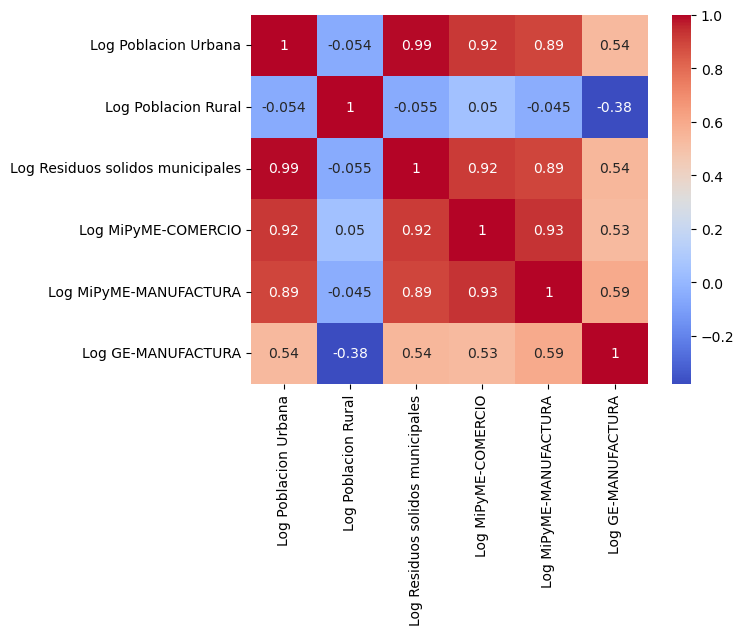

In [166]:
correlacion=df_var.corr()
sns.heatmap(correlacion, annot=True, cmap="coolwarm")

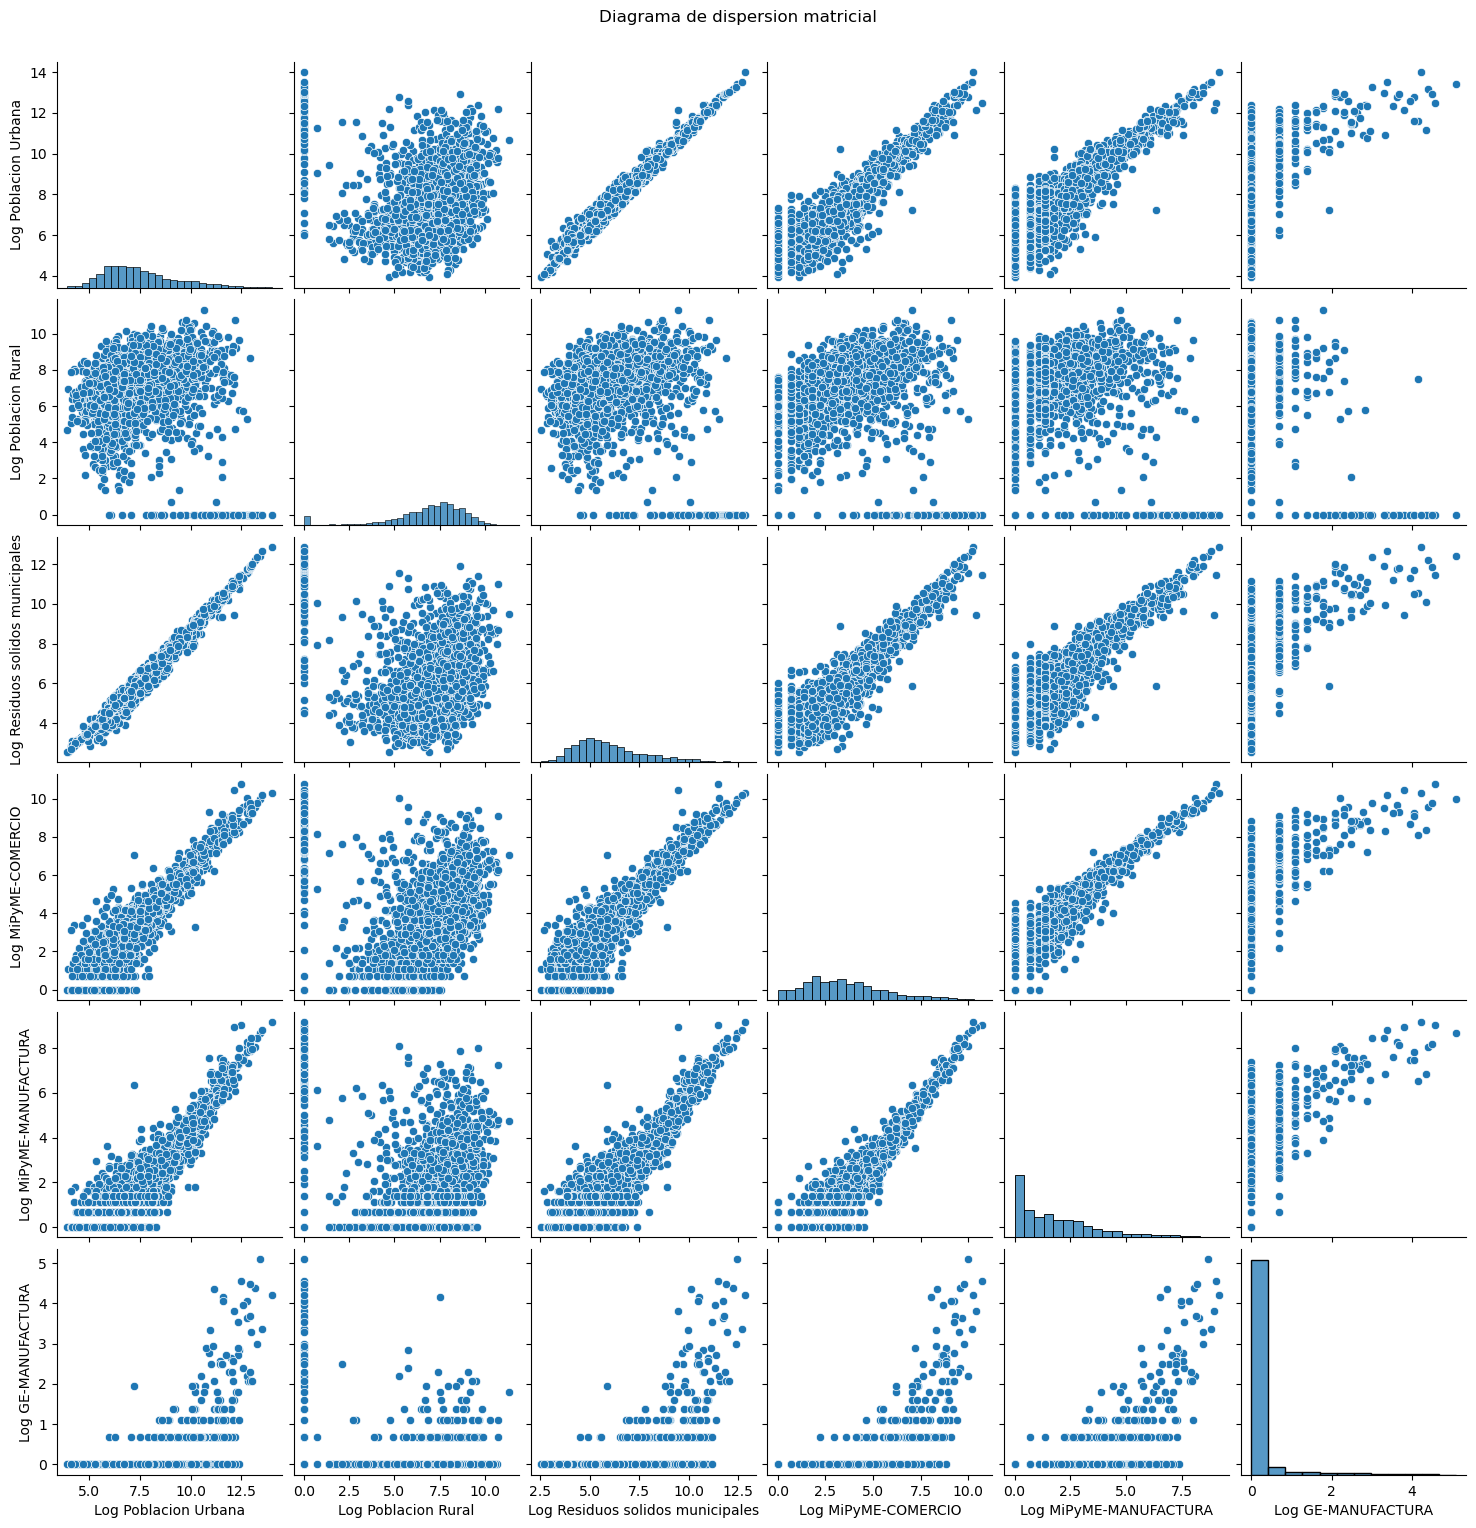

In [167]:
sns.pairplot(df_var)
plt.suptitle("Diagrama de dispersion matricial", y=1.02)
plt.show()

In [168]:
# Definir las variables independientes y dependientes
X = df_var[["Log Poblacion Urbana",
            "Log Poblacion Rural",                    
            "Log MiPyME-COMERCIO",                 
            "Log MiPyME-MANUFACTURA",              
            "Log GE-MANUFACTURA"]]
y = df_var["Log Residuos solidos municipales"]

# Agregar una constante a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Log Residuos solidos municipales   R-squared:                       0.982
Model:                                          OLS   Adj. R-squared:                  0.982
Method:                               Least Squares   F-statistic:                 2.065e+04
Date:                              Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                                      22:10:10   Log-Likelihood:                -56.680
No. Observations:                              1890   AIC:                             125.4
Df Residuals:                                  1884   BIC:                             158.6
Df Model:                                         5                                         
Covariance Type:                          nonrobust                                         
                             coef    std err          t      P>|t|    

In [169]:
#Creamos el PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(estandarizar_variables)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2',"PC3"], index=df_rrss_sinNaN.index)
print(pca_df)



           PC1       PC2       PC3
0    -1.837066 -0.695484  0.019481
1    -1.894849 -1.216925 -0.230020
2    -1.504148 -1.191877 -0.442187
3    -1.972881 -0.200645  0.367040
4    -2.210822 -1.097089  0.020132
...        ...       ...       ...
1886  2.118033  0.978273  1.011467
1887  5.003955  0.652896  1.174633
1888  4.713978  0.495363  0.530992
1889  3.357586  0.453027  1.081355
1890  1.527514  0.520140  0.937189

[1890 rows x 3 columns]


[0.69459904 0.19993614 0.07087634]


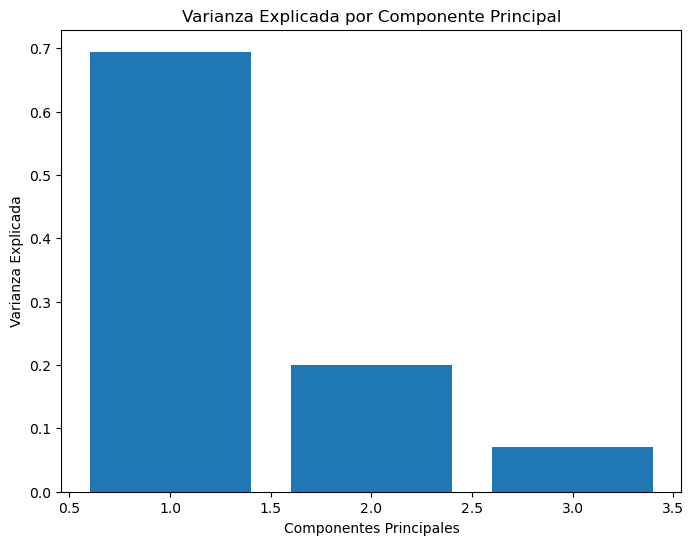

In [170]:
# Varianza explicada
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

# Crear el gráfico de varianza explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

In [171]:
#plt.figure(figsize=(8, 6))
#plt.scatter(pca_df['PC1'], pca_df['PC2'], cmap='viridis')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.title('PCA de los datos')
#plt.colorbar()
#plt.show()

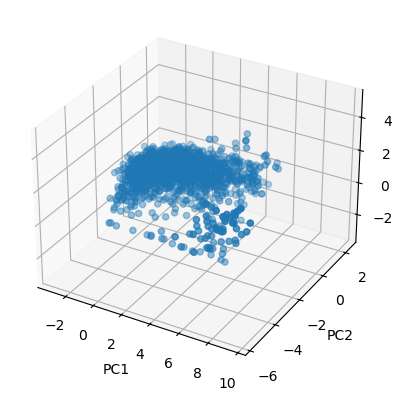

In [172]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

c:\Users\ymnl_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


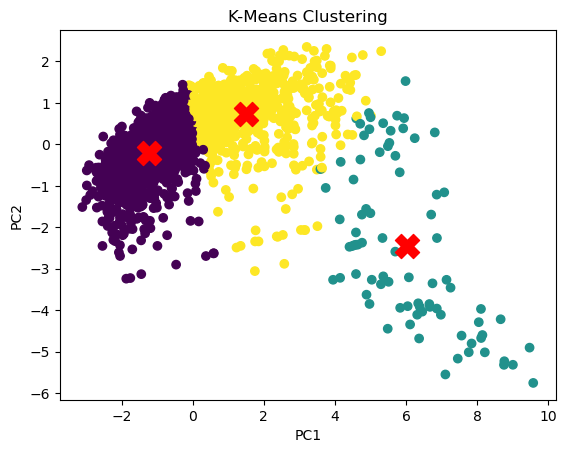

In [173]:
#clusterizamos con la cantidad de clusteres que deseamos y con las paradas e iteraciones
kmeans = KMeans(n_clusters=3, max_iter=300, tol=1e-4, random_state=42)

#Ajustamos el modelo
kmeans.fit(pca_df)

#Obtenemos los centroides y las etiquetas:
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_

pca_df['Cluster2'] = etiquetas

plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster2'], cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], s=300, c='red', marker='X')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.show()

In [174]:
componentes_pca=pd.DataFrame(pca.components_,columns=df_var.columns, index=['PC1', 'PC2', 'PC3'])
print(componentes_pca)

     Log Poblacion Urbana  Log Poblacion Rural  \
PC1              0.473333            -0.055489   
PC2              0.093938             0.856925   
PC3             -0.231618             0.494907   

     Log Residuos solidos municipales  Log MiPyME-COMERCIO  \
PC1                          0.473316             0.467053   
PC2                          0.090432             0.173720   
PC3                         -0.219224            -0.055187   

     Log MiPyME-MANUFACTURA  Log GE-MANUFACTURA  
PC1                0.468387            0.333653  
PC2                0.071084           -0.462002  
PC3               -0.005183            0.806405  


c:\Users\ymnl_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


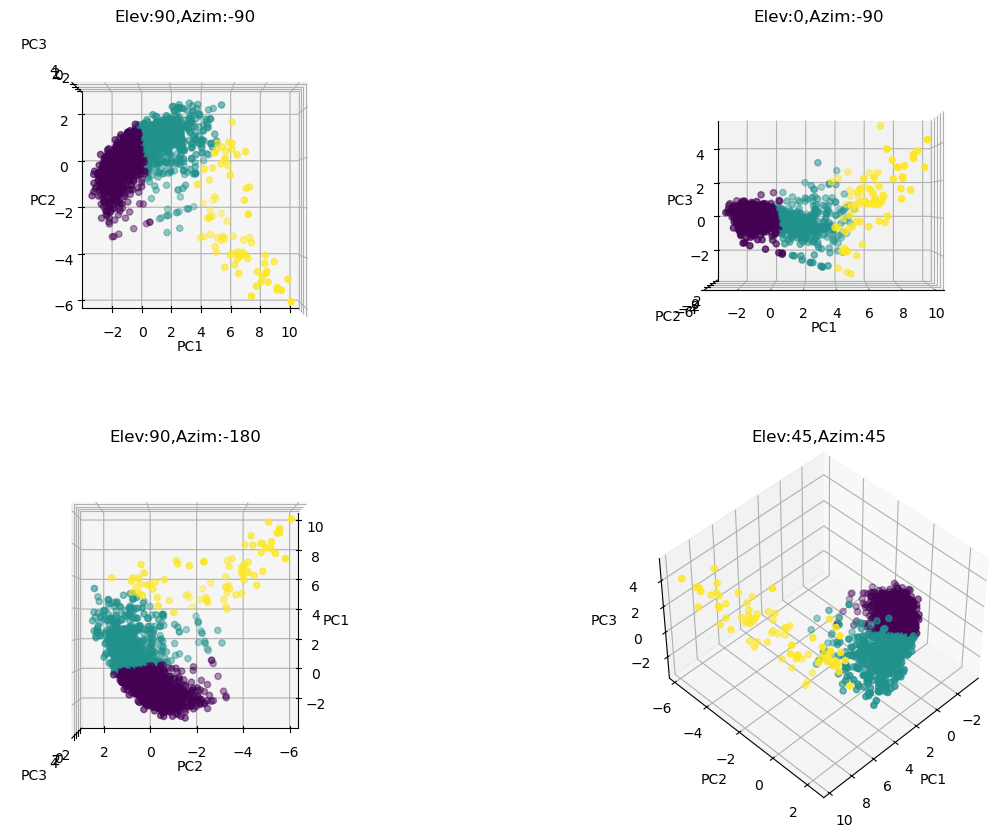

In [175]:
#clusterizamos con la cantidad de clusteres que deseamos y con las paradas e iteraciones
kmeans = KMeans(n_clusters=3)

clusters = kmeans.fit_predict(principal_components)
pca_df['Cluster'] = clusters

# Visualizar clusters
#Le damos el tamaño a los gráficos
fig = plt.figure(figsize=(15,10))

#Damos los angulos de visualización
angulos=[(90,-90),(0,-90),(90,-180),(45,45)]

for i, (elev,azim) in enumerate(angulos):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(f'Elev:{elev},Azim:{azim}')
    ax.view_init(elev=elev, azim=azim)
plt.show()
    

In [176]:
df_dataOriginal_PCA=pd.concat([df_rrss_sinNaN,pca_df], axis=1)
print(df_dataOriginal_PCA)

      IDDIST   NOMBDEP          NOMBPROV       NOMBDIST NOM_CAPITAL (LEGAL)  \
0      10111  AMAZONAS       CHACHAPOYAS        LEVANTO             LEVANTO   
1      10516  AMAZONAS              LUYA  SAN CRISTOBAL                OLTO   
2      20513    ANCASH         BOLOGNESI        PACLLON             PACLLON   
3      20605    ANCASH           CARHUAZ       ATAQUERO             CARHUAC   
4      20902    ANCASH           CORONGO            ACO                 ACO   
...      ...       ...               ...            ...                 ...   
1886  250102   UCAYALI  CORONEL PORTILLO     CAMPOVERDE         CAMPO VERDE   
1887  250105   UCAYALI  CORONEL PORTILLO    YARINACOCHA       PUERTO CALLAO   
1888  250107   UCAYALI  CORONEL PORTILLO       MANANTAY        SAN FERNANDO   
1889  250301   UCAYALI        PADRE ABAD     PADRE ABAD            AGUAYTIA   
1890  250304   UCAYALI        PADRE ABAD        NESHUYA        MONTE ALEGRE   

      COD_ REG_NAT REGION NATURAL REGION_NATURAL TI

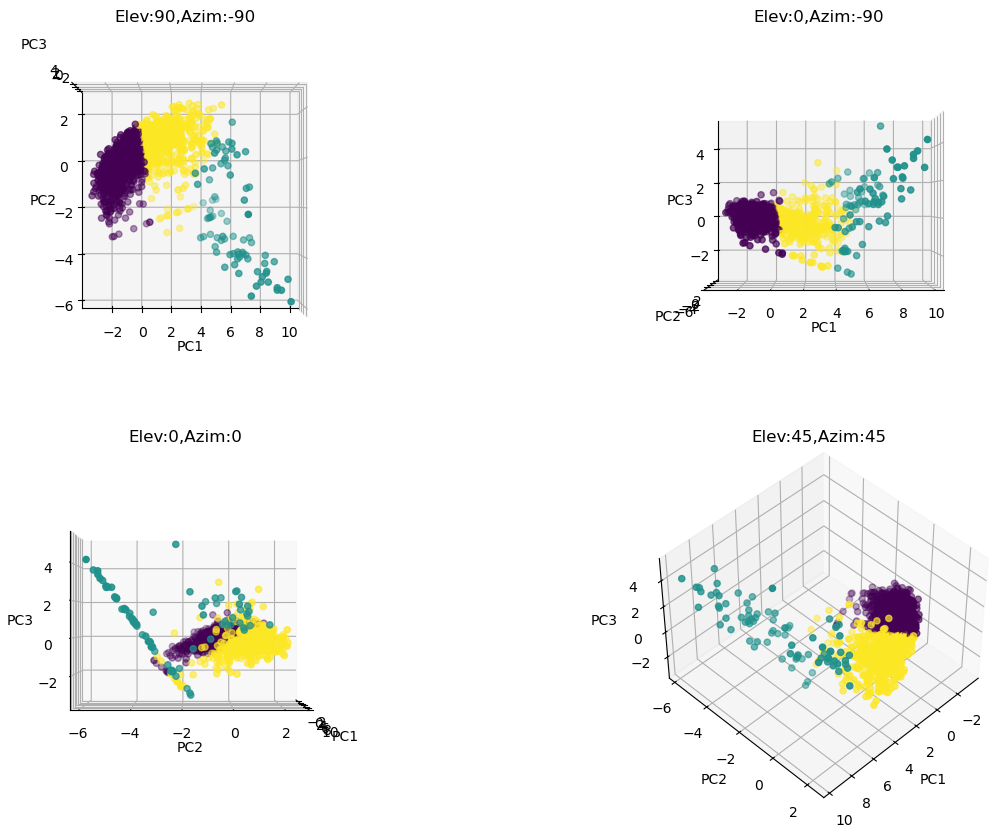

In [177]:
fig = plt.figure(figsize=(15,10))

#Damos los angulos de visualización
angulos=[(90,-90),(0,-90),(0,0),(45,45)]
#90,270 

for i, (elev,azim) in enumerate(angulos):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    scatter = ax.scatter(df_dataOriginal_PCA['PC1'], df_dataOriginal_PCA['PC2'], df_dataOriginal_PCA['PC3'], c=df_dataOriginal_PCA['Cluster2'], cmap='viridis')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(f'Elev:{elev},Azim:{azim}')
    ax.view_init(elev=elev, azim=azim)
plt.show()